In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!pip install pydicom tqdm

In [34]:
import os
import pandas as pd

# === 1 Paths ===
dicom_root = "/content/drive/MyDrive/CTA_Data_Only/Sample_CTA"   # folder containing DICOM series folders
csv_path = "/content/drive/MyDrive/CTA_Data_Only/merged_common_1.csv"  # CSV file path

# === 2 Load CSV ===
df = pd.read_csv(csv_path)

# Ensure SeriesInstanceUID column exists
if "SeriesInstanceUID" not in df.columns:
    raise ValueError(" 'SeriesInstanceUID' column not found in CSV!")

csv_series = set(df["SeriesInstanceUID"].astype(str))

# === 3 Get folder names from DICOM root ===
folder_series = set(os.listdir(dicom_root))

print(f" Total Series in CSV: {len(csv_series)}")
print(f" Total folders in DICOM root: {len(folder_series)}")

# === 4 Compare ===
present_series = csv_series.intersection(folder_series)
missing_series = csv_series.difference(folder_series)
extra_folders = folder_series.difference(csv_series)

print(f" Present Series (found in both CSV & folders): {len(present_series)}")
print(f" Missing Series (in CSV but no folder): {len(missing_series)}")
print(f" Extra Folders (in DICOM folder but not in CSV): {len(extra_folders)}")

# === 5 Save lists for inspection ===
pd.DataFrame({"PresentSeries": list(present_series)}).to_csv("/content/drive/MyDrive/CTA_Data_Only/present_series.csv", index=False)
pd.DataFrame({"MissingSeries": list(missing_series)}).to_csv("/content/drive/MyDrive/CTA_Data_Only/missing_series.csv", index=False)
pd.DataFrame({"ExtraFolders": list(extra_folders)}).to_csv("/content/drive/MyDrive/CTA_Data_Only/extra_folders.csv", index=False)

 Total Series in CSV: 208
 Total folders in DICOM root: 113
 Present Series (found in both CSV & folders): 113
 Missing Series (in CSV but no folder): 95
 Extra Folders (in DICOM folder but not in CSV): 0


In [35]:
import os
import pandas as pd

# === 1 Paths ===
dicom_root = "/content/drive/MyDrive/CTA_Data_Only/Sample_CTA"   # folder containing DICOM series
csv_path = "/content/drive/MyDrive/CTA_Data_Only/merged_common_1.csv"  # original CSV
output_csv = "/content/drive/MyDrive/CTA_Data_Only/merged_common_1_filtered.csv"  # cleaned CSV

# === 2 Load CSV ===
df = pd.read_csv(csv_path)

if "SeriesInstanceUID" not in df.columns:
    raise ValueError(" 'SeriesInstanceUID' column not found in the CSV!")

# === 3 Get all folder names from DICOM directory ===
folder_series = set(os.listdir(dicom_root))

print(f" Total folders in DICOM root: {len(folder_series)}")
print(f" Total rows in CSV: {len(df)}")

# === 4 Keep only rows whose SeriesInstanceUID exists in folders ===
filtered_df = df[df["SeriesInstanceUID"].astype(str).isin(folder_series)]

# === 5 Show stats ===
missing_count = len(df) - len(filtered_df)
print(f" Rows kept: {len(filtered_df)}")
print(f" Rows removed (missing folders): {missing_count}")

# === 6 Save filtered CSV ===
filtered_df.to_csv(output_csv, index=False)
print(f" Cleaned CSV saved to: {output_csv}")

 Total folders in DICOM root: 113
 Total rows in CSV: 242
 Rows kept: 131
 Rows removed (missing folders): 111
 Cleaned CSV saved to: /content/drive/MyDrive/CTA_Data_Only/merged_common_1_filtered.csv


In [36]:
df_out = pd.read_csv(output_csv)

In [37]:
df_out

SeriesInstanceUID  PatientAge PatientSex  \
0    1.2.826.0.1.3680043.8.498.10005158603912009425...          58       Male   
1    1.2.826.0.1.3680043.8.498.10014757658335054766...          53     Female   
2    1.2.826.0.1.3680043.8.498.10022796280698534221...          78       Male   
3    1.2.826.0.1.3680043.8.498.10034081836061566510...          54       Male   
4    1.2.826.0.1.3680043.8.498.10035643165968342618...          62     Female   
..                                                 ...         ...        ...   
126  1.2.826.0.1.3680043.8.498.11197360217163173903...          21     Female   
127  1.2.826.0.1.3680043.8.498.11198040458062989149...          65     Female   
128  1.2.826.0.1.3680043.8.498.11198791437802468548...          38     Female   
129  1.2.826.0.1.3680043.8.498.11221457333679790789...          64       Male   
130  1.2.826.0.1.3680043.8.498.11353979803094578411...          44     Female   

    Modality  Left Infraclinoid Internal Carotid Artery  \
0        CTA                                          0   
1        CTA                                          0   
2        CTA                                          0   
3        CTA                                          0   
4        CTA                                          0   
..       ...                                        ...   
126      CTA                                          0   
127      CTA                                          0   
128      CTA                                          0   
129      CTA                                          0   
130      CTA                                          0   

     Right Infraclinoid Internal Carotid Artery  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
..                                          ...   
126                                           0   
127                                           0   
128                                           0   
129                                           0   
130                                           0   

     Left Supraclinoid Internal Carotid Artery  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
126                                          1   
127                                          0   
128                                          0   
129                                          0   
130                                          0   

     Right Supraclinoid Internal Carotid Artery  Left Middle Cerebral Artery  \
0                                             0                            0   
1                                             0                            0   
2                                             0                            0   
3                                             0                            0   
4                                             1                            1   
..                                          ...                          ...   
126                                           0                            0   
127                                           0                            0   
128                                           1                            0   
129                                           0                            0   
130                                           0                            0   

     Right Middle Cerebral Artery  ...  Left Anterior Cerebral Artery  \
0                               0  ...                              0   
1                               0 

In [38]:
df_out.shape

(131, 21)

In [39]:
df_out.columns

Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present', 'SOPInstanceUID',
       'coordinates', 'location'],
      dtype='object')

In [40]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SeriesInstanceUID                           131 non-null    object
 1   PatientAge                                  131 non-null    int64 
 2   PatientSex                                  131 non-null    object
 3   Modality                                    131 non-null    object
 4   Left Infraclinoid Internal Carotid Artery   131 non-null    int64 
 5   Right Infraclinoid Internal Carotid Artery  131 non-null    int64 
 6   Left Supraclinoid Internal Carotid Artery   131 non-null    int64 
 7   Right Supraclinoid Internal Carotid Artery  131 non-null    int64 
 8   Left Middle Cerebral Artery                 131 non-null    int64 
 9   Right Middle Cerebral Artery                131 non-null    int64 
 10  Anterior Communicating Art

In [41]:
df_out.describe()

PatientAge  Left Infraclinoid Internal Carotid Artery  \
count  131.000000                                 131.000000   
mean    58.893130                                   0.007634   
std     14.927647                                   0.087370   
min     20.000000                                   0.000000   
25%     47.000000                                   0.000000   
50%     60.000000                                   0.000000   
75%     68.000000                                   0.000000   
max     89.000000                                   1.000000   

       Right Infraclinoid Internal Carotid Artery  \
count                                  131.000000   
mean                                     0.061069   
std                                      0.240376   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       Left Supraclinoid Internal Carotid Artery  \
count                                 131.000000   
mean                                    0.122137   
std                                     0.328701   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       Right Supraclinoid Internal Carotid Artery  \
count                                  131.000000   
mean                                     0.106870   
std                                      0.310134   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       Left Middle Cerebral Artery  Right Middle Cerebral Artery  \
count                   131.000000                    131.000000   
mean                      0.122137                      0.114504   
std                       0.328701                      0.319645   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       0.000000                      0.000000   
75%                       0.000000                      0.000000   
max                       1.000000                      1.000000   

       Anterior Communicating Artery  Left Anterior Cerebral Artery  \
count                     131.000000                     131.000000   
mean                        0.114504                       0.030534   
std                         0.319645                       0.172713   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       Right Anterior Cerebral Artery  Left Posterior Communicating Artery  \
count                      131.000000                           131.000000   
mean                         0.053435                             0.068702   
std                          0.225763                             0.253918   
min                          0.000000                             0.000000   
25%                          0.000000                             0.000000   
50%                          0.000000                             0.000000   
75%                          0.000000                             0.000000   
max                          1.000000                             1.000000   

       Right Posterior Communicating Artery  Basi

In [42]:
df_out.isnull().sum()

SeriesInstanceUID                             0
PatientAge                                    0
PatientSex                                    0
Modality                                      0
Left Infraclinoid Internal Carotid Artery     0
Right Infraclinoid Internal Carotid Artery    0
Left Supraclinoid Internal Carotid Artery     0
Right Supraclinoid Internal Carotid Artery    0
Left Middle Cerebral Artery                   0
Right Middle Cerebral Artery                  0
Anterior Communicating Artery                 0
Left Anterior Cerebral Artery                 0
Right Anterior Cerebral Artery                0
Left Posterior Communicating Artery           0
Right Posterior Communicating Artery          0
Basilar Tip                                   0
Other Posterior Circulation                   0
Aneurysm Present                              0
SOPInstanceUID                                0
coordinates                                   0
location                                      0
dtype: int64

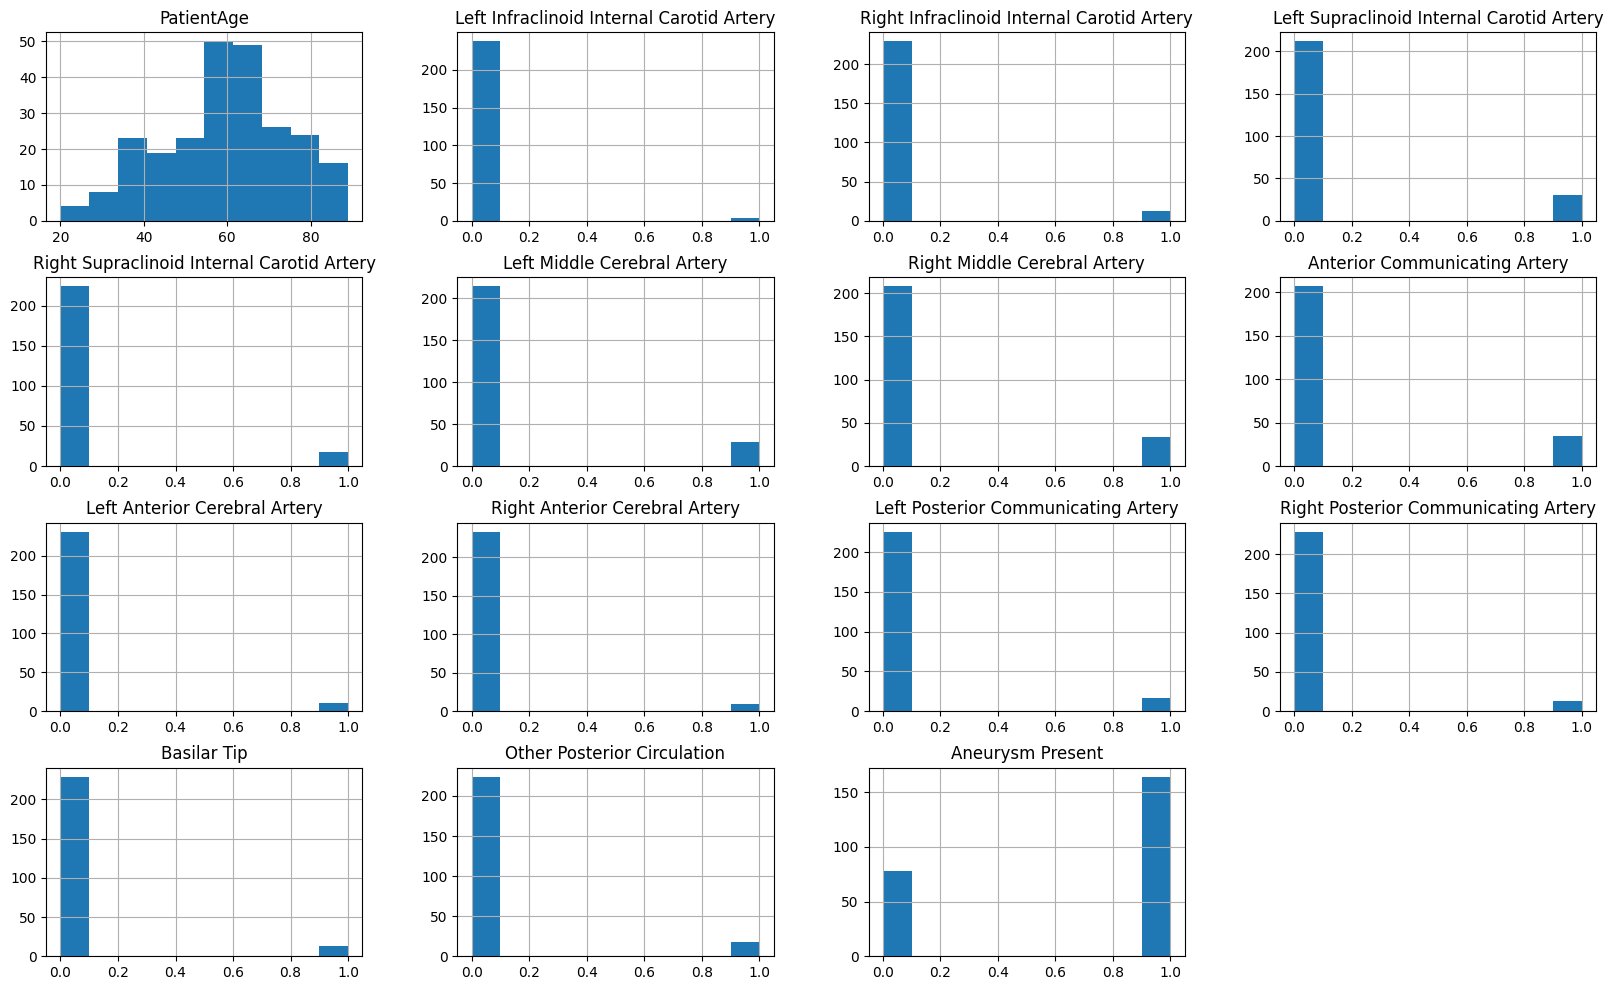

In [43]:
import matplotlib.pyplot as plt

# Histogram
df.hist(figsize=(20, 12))
plt.show()

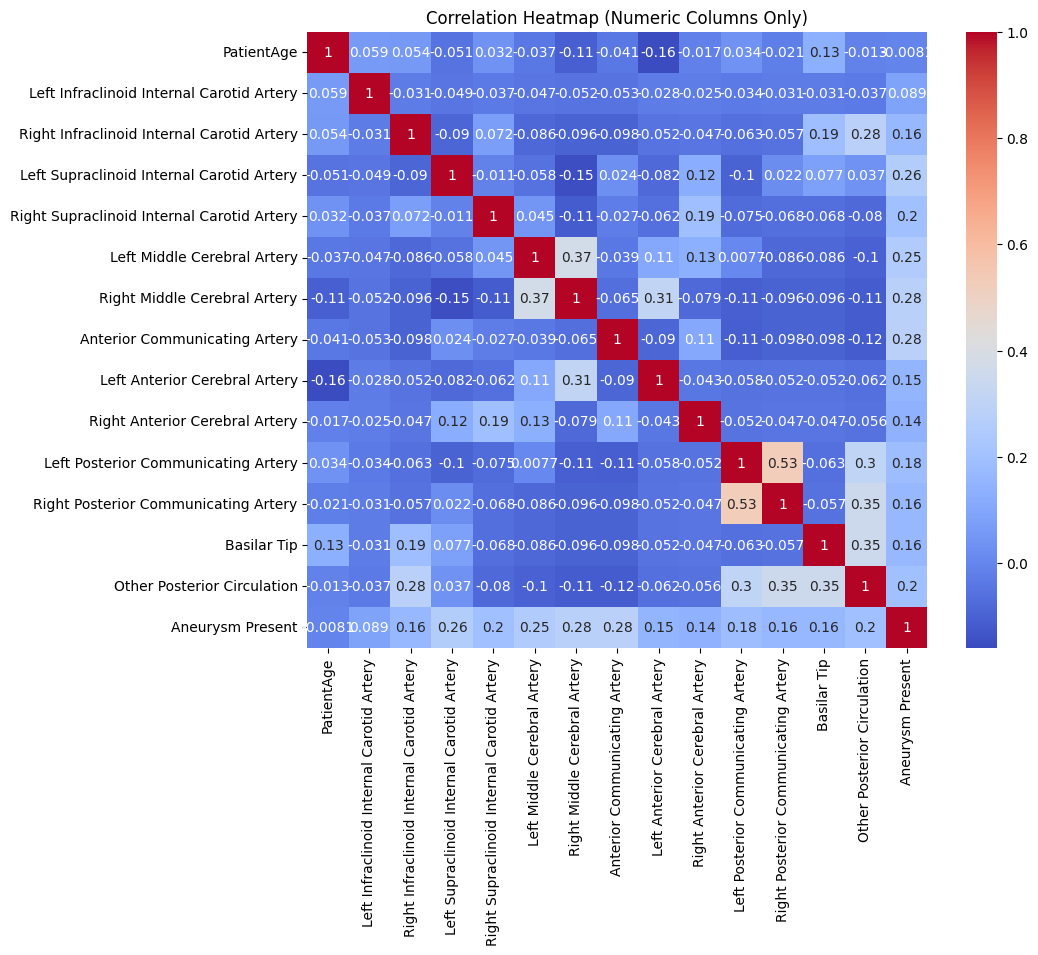

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [59]:
import os
import cv2
import ast
import pydicom
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# === Paths ===
dicom_root = "/content/drive/MyDrive/CTA_Data_Only/Sample_CTA"   # folder containing DICOM series
csv_path = "/content/drive/MyDrive/CTA_Data_Only/merged_common_1_filtered.csv"  # CSV with metadata
output_dir = "/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset"

# === Parameters ===
fixed_box_size = 40  # pixels
test_ratio = 0.50     # 50% test split

# === Load Data ===
df = pd.read_csv(csv_path)

# Keep only positive cases (aneurysm present = 1)
df = df[df["Aneurysm Present"] == 1].reset_index(drop=True)

# === Split Train/Test ===
train_df, test_df = train_test_split(df, test_size=test_ratio, random_state=42)

print(f"Train samples: {len(train_df)} | Test samples: {len(test_df)}")

# === Helper Function to Process Rows ===
def process_dataset(sub_df, subset_name):
    img_dir = os.path.join(output_dir, "images", subset_name)
    lbl_dir = os.path.join(output_dir, "labels", subset_name)
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(lbl_dir, exist_ok=True)

    for _, row in tqdm(sub_df.iterrows(), total=len(sub_df), desc=f"Processing {subset_name}"):
        series_id = str(row["SeriesInstanceUID"])
        sop_id = str(row["SOPInstanceUID"])
        coord = row["coordinates"]

        # Parse coordinates safely
        try:
            coord = ast.literal_eval(coord)
            x, y = coord.get("x"), coord.get("y")
        except Exception as e:
            print(f"Skipping {sop_id}: invalid coordinates ({e})")
            continue

        dcm_path = os.path.join(dicom_root, series_id, f"{sop_id}.dcm")
        if not os.path.exists(dcm_path):
            print(f"Missing DICOM: {dcm_path}")
            continue

        # Convert DICOM → PNG
        try:
            dcm = pydicom.dcmread(dcm_path)
            img = dcm.pixel_array
            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
            img = img.astype("uint8")
            h, w = img.shape

            out_img_path = os.path.join(img_dir, f"{sop_id}.png")
            cv2.imwrite(out_img_path, img)

            # Create YOLO label file
            x_center = x / w
            y_center = y / h
            width = fixed_box_size / w
            height = fixed_box_size / h

            out_lbl_path = os.path.join(lbl_dir, f"{sop_id}.txt")
            with open(out_lbl_path, "w") as f:
                f.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        except Exception as e:
            print(f"Error processing {dcm_path}: {e}")

# === Process Train & Test Sets ===
process_dataset(train_df, "train")
process_dataset(test_df, "test")

print("\n Train/Test YOLO dataset created successfully!")

Train samples: 43 | Test samples: 43


Processing test: 100%|██████████| 43/43 [00:01<00:00, 26.22it/s]


✅ Train/Test YOLO dataset created successfully!


In [60]:
yaml_content = """train: /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/train
val: /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test
nc: 1
names: ['aneurysm']
"""

with open("/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml", "w") as f:
    f.write(yaml_content)


In [61]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # start with nano model
model.train(data="/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml", epochs=100, imgsz=512)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8402f2d580>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [62]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [63]:
test_dir = "/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test"  # or /val if you have validation
results = model.predict(
    source=test_dir,
    imgsz=512,
    conf=0.25,   # confidence threshold
    save=True,   # saves output images
)


image 1/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10058842517012896780975718617067182938.png: 512x512 (no detections), 6.0ms
image 2/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10135039086689281605916205100052119815.png: 512x512 (no detections), 5.9ms
image 3/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10291206100524676353177889457912941488.png: 512x512 (no detections), 5.9ms
image 4/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10330800208132441897498011905367111919.png: 512x512 (no detections), 5.8ms
image 5/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10775329348174902199350466348663848346.png: 512x512 (no detections), 6.0ms
image 6/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.108449

In [64]:
metrics = model.val(data="/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml", imgsz=512)
print(metrics)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 28.7±9.6 MB/s, size: 71.5 KB)
val: Scanning /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/labels/test.cache... 43 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 43/43 68.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.4it/s 2.1s
                   all         43         43      0.517      0.349      0.433      0.206
Speed: 6.7ms preprocess, 8.2ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8402bc0950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_re

Showing images from: /content/runs/detect/predict2


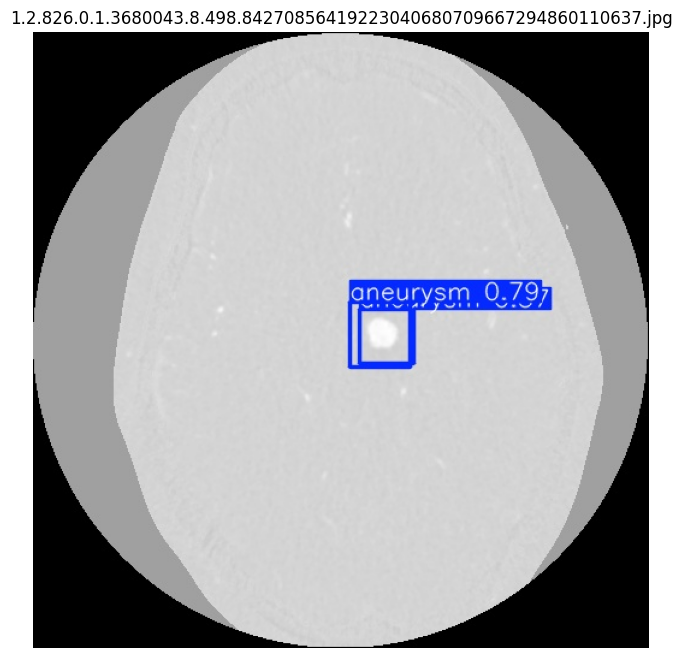

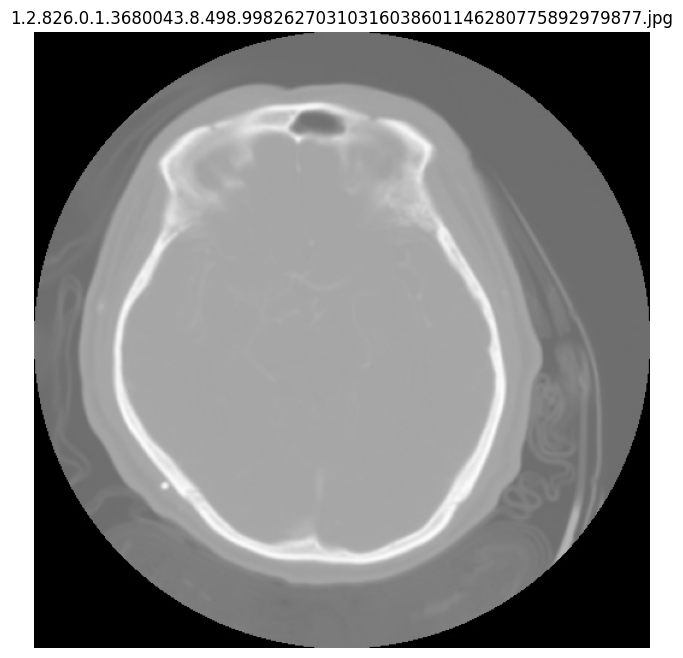

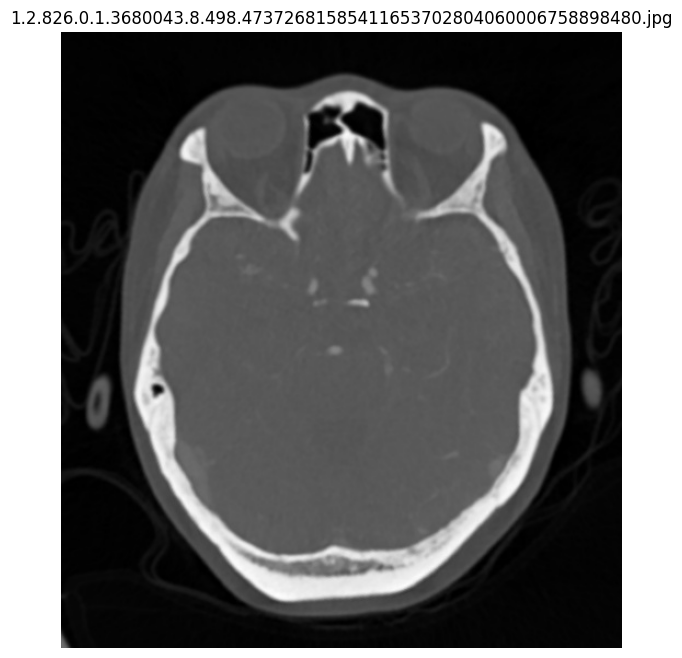

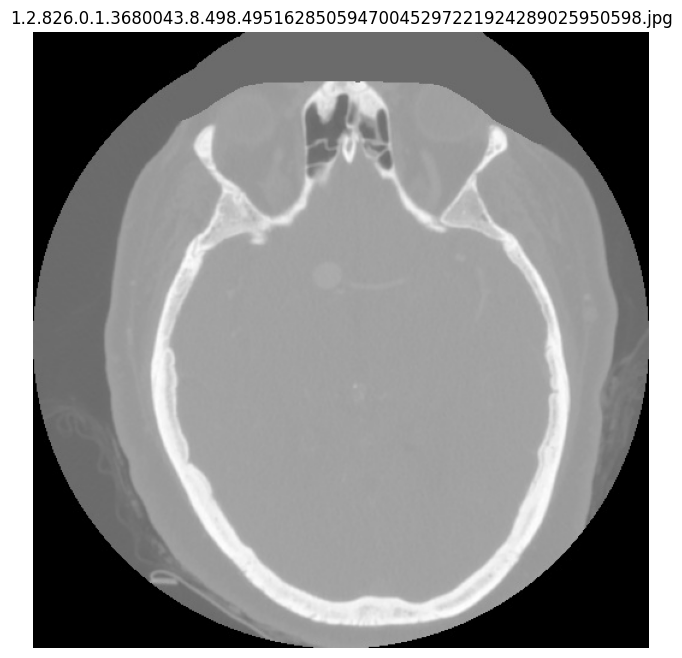

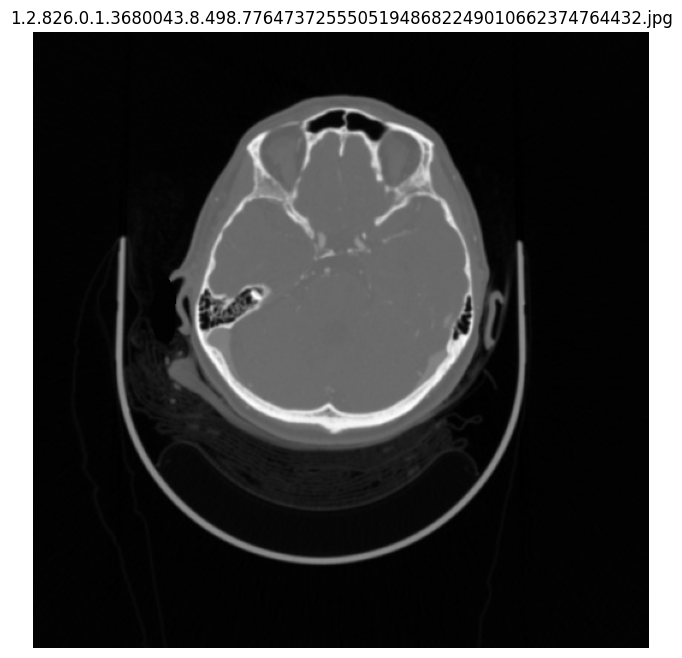

In [65]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Path to saved predictions (check the last 'runs/detect' folder)
pred_path = sorted(glob.glob('/content/runs/detect/predict*'))[-1]
print("Showing images from:", pred_path)

# Display a few sample outputs
image_files = glob.glob(os.path.join(pred_path, '*.jpg'))

for img_path in image_files[:5]:  # show first 5 predictions
    img = Image.open(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path))
    plt.show()

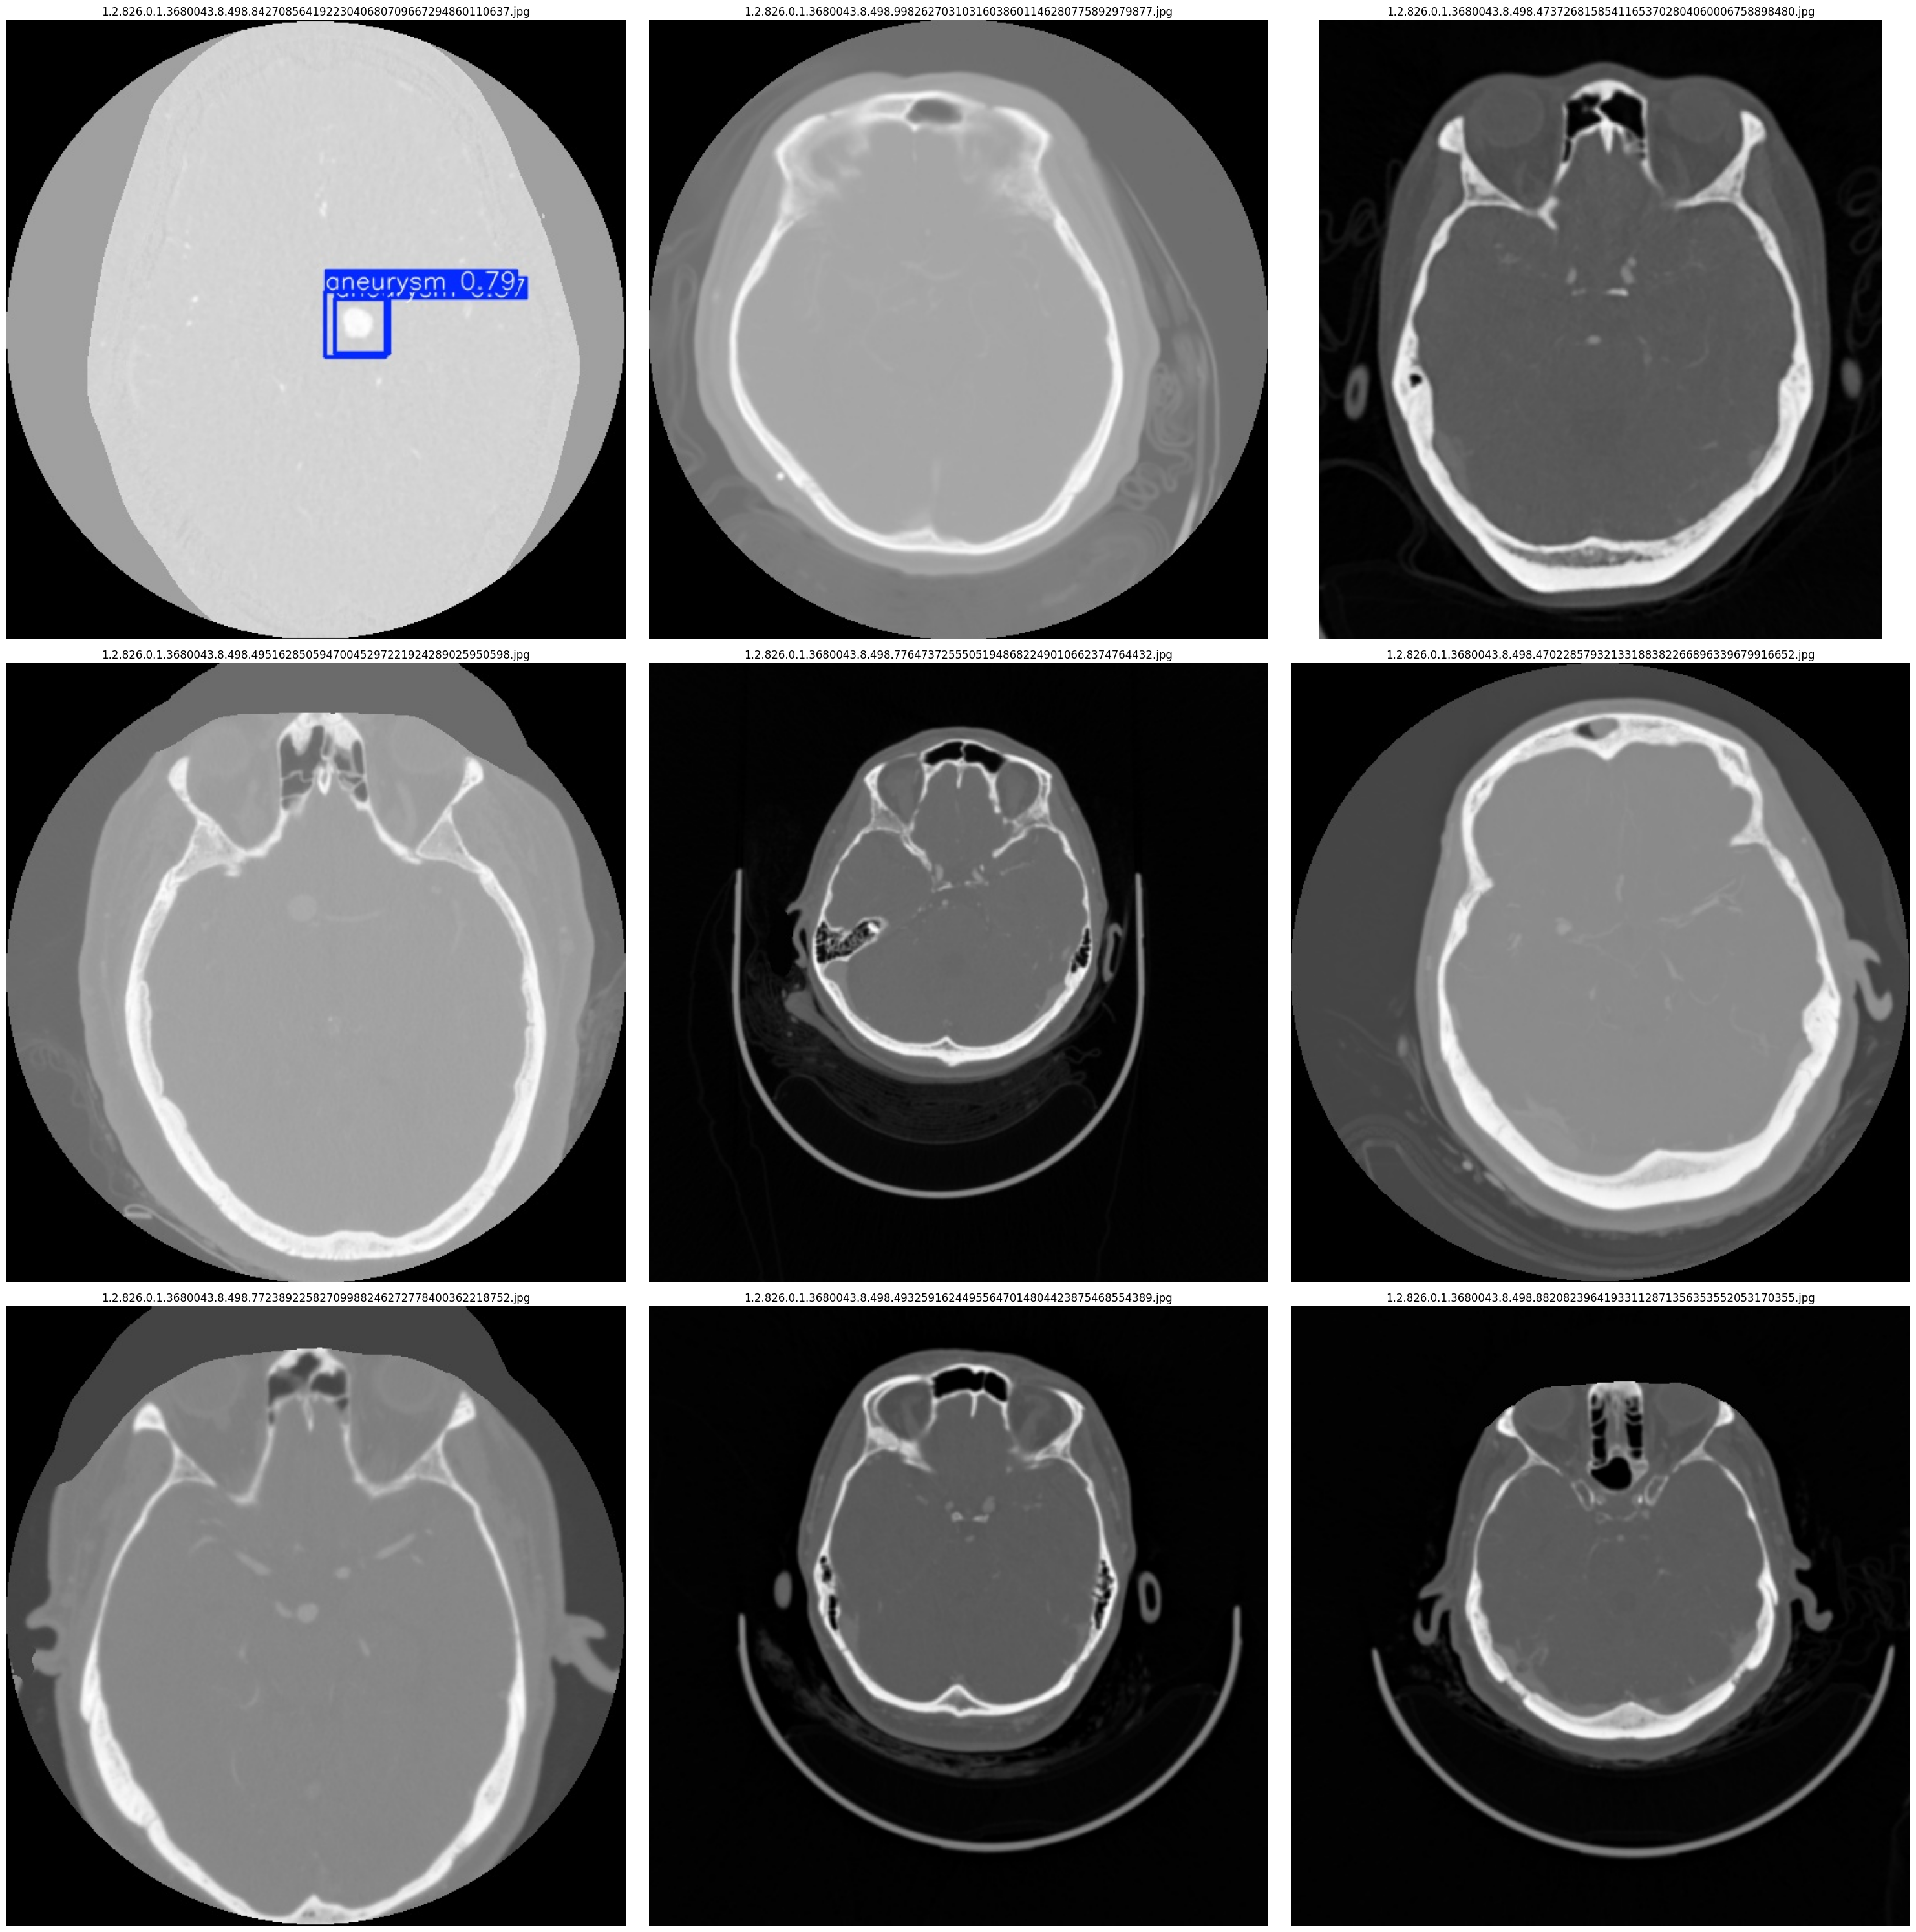

In [67]:
import math

cols = 3
rows = math.ceil(len(image_files[:9]) / cols)
plt.figure(figsize=(30, 10 * rows))

for i, img_path in enumerate(image_files[:9]):
    img = Image.open(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

Converting DICOMs: 100%|██████████| 451/451 [00:29<00:00, 15.46it/s]


 All DICOMs converted to PNGs.

 Found 5 slices with aneurysm confidence > 75%.
Example high-confidence detections: ['1.2.826.0.1.3680043.8.498.44063575700150859922065186196299772228.png', '1.2.826.0.1.3680043.8.498.75440817043067788205894148885970493920.png', '1.2.826.0.1.3680043.8.498.91309701216250091212634016345496831009.png', '1.2.826.0.1.3680043.8.498.95172371275626501750135958028330331648.png', '1.2.826.0.1.3680043.8.498.99995574975275693008166321773480618368.png']


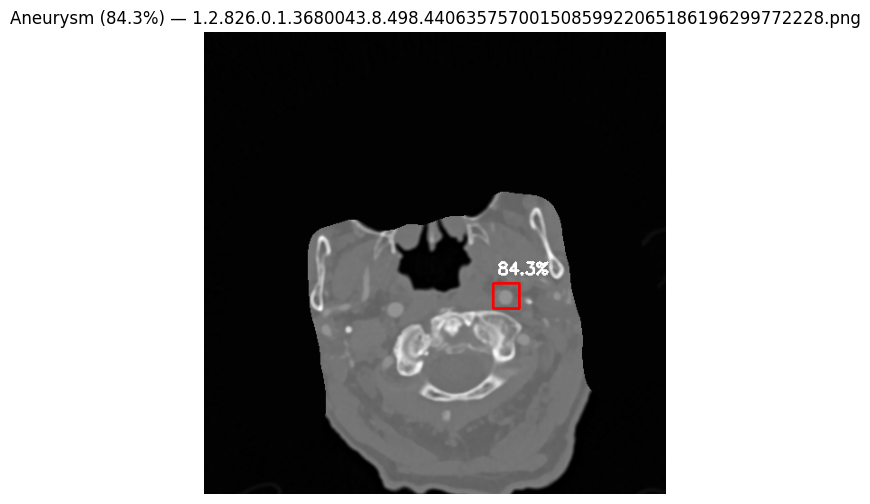

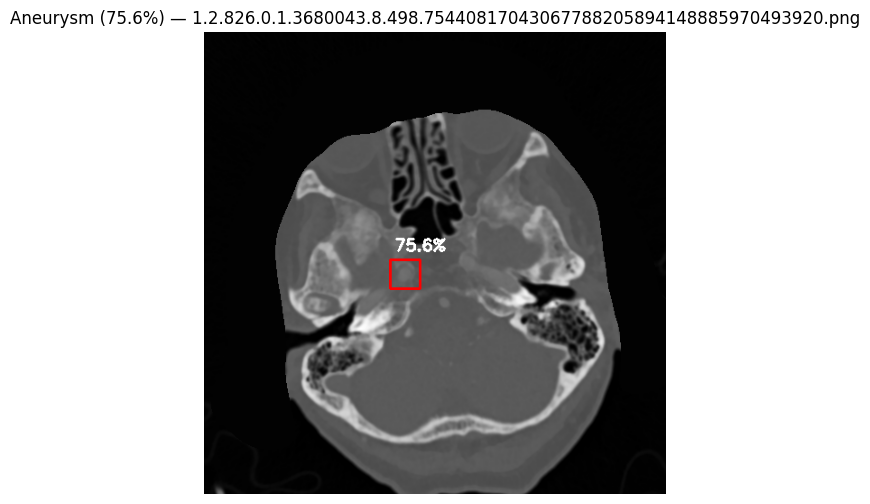

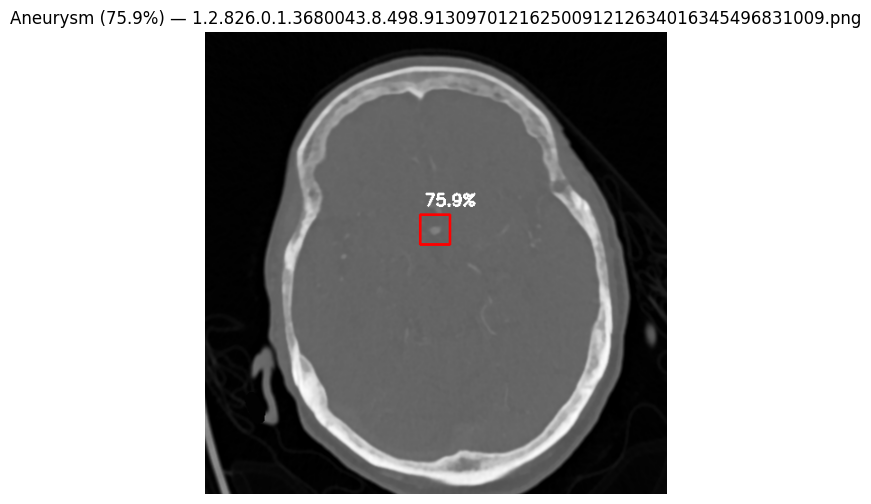

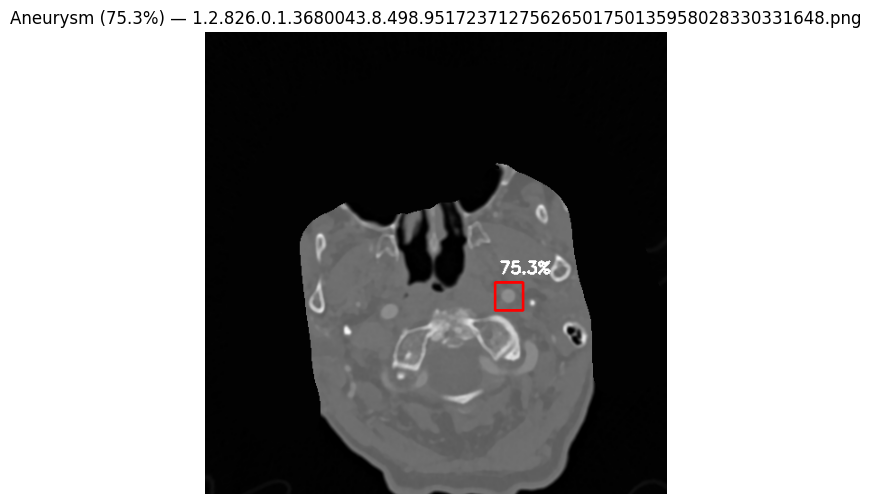

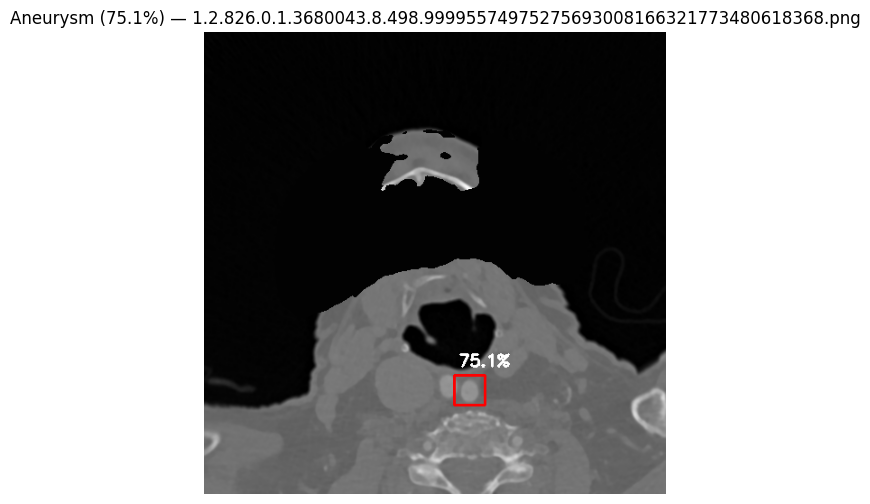


 Saved all high-confidence detections with RED boxes to: /content/drive/MyDrive/CTA_Data_Only/cta_high_conf_results3


In [78]:
# ============================================
# 1 INSTALL & IMPORTS
# ============================================
#!pip install ultralytics pydicom opencv-python matplotlib tqdm

import os
import cv2
import numpy as np
import pydicom
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ============================================
# 2 PATH SETUP
# ============================================
dicom_folder = "/content/drive/MyDrive/ICAD_data/1.2.826.0.1.3680043.8.498.10030095840917973694487307992374923817"  # input dicom folder
png_output = "/content/drive/MyDrive/CTA_Data_Only/cta_png_test_8"       # converted pngs
model_path = "/content/runs/detect/train3/weights/best.pt"  # your trained model
save_dir = "/content/drive/MyDrive/CTA_Data_Only/cta_high_conf_results3"        # output folder
os.makedirs(png_output, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# ============================================
# 3 DICOM ➜ PNG CONVERSION
# ============================================
def dicom_to_png(dicom_path, output_path):
    ds = pydicom.dcmread(dicom_path)
    img = ds.pixel_array.astype(float)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = (img * 255).astype(np.uint8)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.imwrite(output_path, img_rgb)

for root, _, files in os.walk(dicom_folder):
    for f in tqdm(files, desc="Converting DICOMs"):
        if f.endswith(".dcm"):
            dcm_path = os.path.join(root, f)
            png_name = f.replace(".dcm", ".png")
            out_path = os.path.join(png_output, png_name)
            dicom_to_png(dcm_path, out_path)

print(" All DICOMs converted to PNGs.")

# ============================================
# 4 YOLOv8 INFERENCE
# ============================================
model = YOLO(model_path)
results = model.predict(
    source=png_output,
    imgsz=640,
    conf=0.25,
    save=False,
    verbose=False
)

# ============================================
# 5 FILTER HIGH-CONFIDENCE (>75%) DETECTIONS
# ============================================
high_conf_files = {}

for r in results:
    if len(r.boxes) > 0:
        for box in r.boxes:
            conf = float(box.conf[0])
            if conf >= 0.75:
                file_name = os.path.basename(r.path)
                if file_name not in high_conf_files:
                    high_conf_files[file_name] = []
                high_conf_files[file_name].append((box.xyxy[0].cpu().numpy(), conf))

print(f"\n Found {len(high_conf_files)} slices with aneurysm confidence > 75%.")
if high_conf_files:
    example_files = list(high_conf_files.keys())[:5]
    print("Example high-confidence detections:", example_files)
else:
    print(" No aneurysm detections >75% confidence found.")

# ============================================
# 6 DRAW SMALL RED BOUNDING BOXES & SAVE
# ============================================
for i, (png_file, boxes_conf) in enumerate(high_conf_files.items()):
    png_path = os.path.join(png_output, png_file)
    if not os.path.exists(png_path):
        continue

    img = cv2.imread(png_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box, conf in boxes_conf:
        x1, y1, x2, y2 = map(int, box)
        # Make box smaller for visualization
        pad = 5
        x1, y1, x2, y2 = x1 + pad, y1 + pad, x2 - pad, y2 - pad
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # RED BOX
        cv2.putText(img, f"{conf*100:.1f}%", (x1 + 5, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Save annotated image
    save_path = os.path.join(save_dir, png_file)
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Aneurysm ({conf*100:.1f}%) — {png_file}")
    plt.axis("off")
    plt.show()

    if i >= 6:
        break

print(f"\n Saved all high-confidence detections with RED boxes to: {save_dir}")

In [79]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # start with nano model
model.train(data="/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml", epochs=100, imgsz=512)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e83f55478f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [80]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/content/runs/detect/train4/weights/best.pt")

In [81]:
test_dir = "/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test"  # or /val if you have validation
results = model.predict(
    source=test_dir,
    imgsz=512,
    conf=0.25,   # confidence threshold
    save=True,   # saves output images
)


image 1/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10058842517012896780975718617067182938.png: 512x512 2 aneurysms, 7.4ms
image 2/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10135039086689281605916205100052119815.png: 512x512 1 aneurysm, 7.7ms
image 3/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10291206100524676353177889457912941488.png: 512x512 1 aneurysm, 7.5ms
image 4/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10330800208132441897498011905367111919.png: 512x512 1 aneurysm, 7.6ms
image 5/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.10775329348174902199350466348663848346.png: 512x512 1 aneurysm, 7.6ms
image 6/43 /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/images/test/1.2.826.0.1.3680043.8.498.108449350236386112670859242019

In [82]:
metrics = model.val(data="/content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/data.yaml", imgsz=512)
print(metrics)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 46.9±10.6 MB/s, size: 71.5 KB)
val: Scanning /content/drive/MyDrive/CTA_Data_Only/yolo_cta_dataset/labels/test.cache... 43 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 43/43 35.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.1it/s 2.7s
                   all         43         43      0.917       0.86      0.935      0.669
Speed: 7.3ms preprocess, 16.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to /content/runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e83f50804a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_

Converting DICOMs: 100%|██████████| 281/281 [00:10<00:00, 26.54it/s]


 All DICOMs converted to PNGs.

 Found 1 slices with aneurysm confidence > 75%.
Example high-confidence detections: ['1.2.826.0.1.3680043.8.498.26780452130501329428241006823692555178.png']


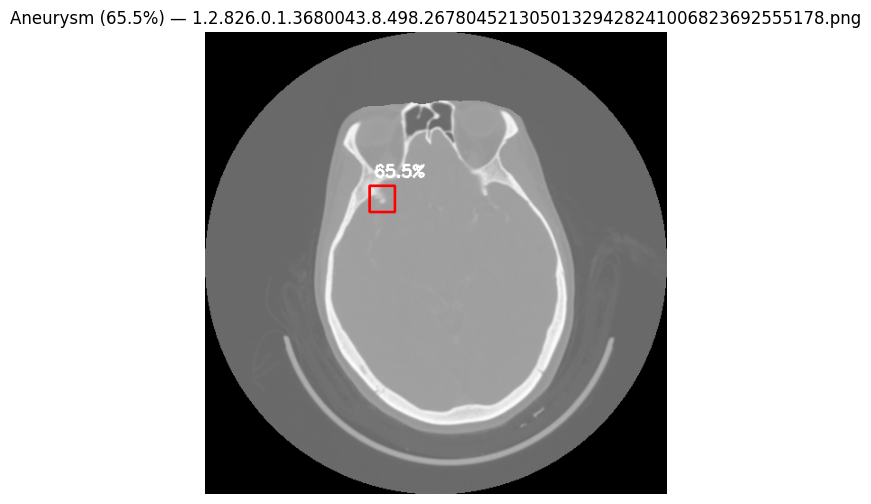


 Saved all high-confidence detections with RED boxes to: /content/drive/MyDrive/CTA_Data_Only/cta_high_conf_results3


In [83]:
# ============================================
# 1 INSTALL & IMPORTS
# ============================================
#!pip install ultralytics pydicom opencv-python matplotlib tqdm

import os
import cv2
import numpy as np
import pydicom
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ============================================
# 2 PATH SETUP
# ============================================
dicom_folder = "/content/drive/MyDrive/CTA_Data_Only/1.2.826.0.1.3680043.8.498.61152918475243358118286003299125054478"  # input dicom folder
png_output = "/content/drive/MyDrive/CTA_Data_Only/cta_png_test9"       # converted pngs
model_path = "/content/runs/detect/train4/weights/best.pt"  # your trained model
save_dir = "/content/drive/MyDrive/CTA_Data_Only/cta_high_conf_results3"        # output folder
os.makedirs(png_output, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# ============================================
# 3 DICOM ➜ PNG CONVERSION
# ============================================
def dicom_to_png(dicom_path, output_path):
    ds = pydicom.dcmread(dicom_path)
    img = ds.pixel_array.astype(float)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = (img * 255).astype(np.uint8)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.imwrite(output_path, img_rgb)

for root, _, files in os.walk(dicom_folder):
    for f in tqdm(files, desc="Converting DICOMs"):
        if f.endswith(".dcm"):
            dcm_path = os.path.join(root, f)
            png_name = f.replace(".dcm", ".png")
            out_path = os.path.join(png_output, png_name)
            dicom_to_png(dcm_path, out_path)

print(" All DICOMs converted to PNGs.")

# ============================================
# 4 YOLOv8 INFERENCE
# ============================================
model = YOLO(model_path)
results = model.predict(
    source=png_output,
    imgsz=640,
    conf=0.25,
    save=False,
    verbose=False
)

# ============================================
# 5 FILTER HIGH-CONFIDENCE (>75%) DETECTIONS
# ============================================
high_conf_files = {}

for r in results:
    if len(r.boxes) > 0:
        for box in r.boxes:
            conf = float(box.conf[0])
            if conf >= 0.65:
                file_name = os.path.basename(r.path)
                if file_name not in high_conf_files:
                    high_conf_files[file_name] = []
                high_conf_files[file_name].append((box.xyxy[0].cpu().numpy(), conf))

print(f"\n Found {len(high_conf_files)} slices with aneurysm confidence > 75%.")
if high_conf_files:
    example_files = list(high_conf_files.keys())[:5]
    print("Example high-confidence detections:", example_files)
else:
    print(" No aneurysm detections >75% confidence found.")

# ============================================
# 6 DRAW SMALL RED BOUNDING BOXES & SAVE
# ============================================
for i, (png_file, boxes_conf) in enumerate(high_conf_files.items()):
    png_path = os.path.join(png_output, png_file)
    if not os.path.exists(png_path):
        continue

    img = cv2.imread(png_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box, conf in boxes_conf:
        x1, y1, x2, y2 = map(int, box)
        # Make box smaller for visualization
        pad = 5
        x1, y1, x2, y2 = x1 + pad, y1 + pad, x2 - pad, y2 - pad
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # RED BOX
        cv2.putText(img, f"{conf*100:.1f}%", (x1 + 5, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Save annotated image
    save_path = os.path.join(save_dir, png_file)
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Aneurysm ({conf*100:.1f}%) — {png_file}")
    plt.axis("off")
    plt.show()

    if i >= 6:
        break

print(f"\n Saved all high-confidence detections with RED boxes to: {save_dir}")